# Load in dataset
A dataset was created in Create_dataset_for_training_MS2Query_model.ipynb. This dataset contains 4 dataframes with the scores for the top 2000 matches for each query spectrum in a validation and a training set. The scores are pasted after each other, so it can be used directly for training MS2Query models. 

In [2]:
from ms2query.utils import load_pickled_file
training_scores, training_labels, validation_scores, validation_labels = \
    load_pickled_file("../downloads/gnps_210409/train_ms2query_model/ms2q_training_data.pickle")

# Data exploration
It is important to use a dataset that trains recognizing high scores as well as recognizing low scores. Here the top 2000 highest MS2deepscore scores are selected. However since most tanimoto scores are selected in this way, the network is still trained mostly for low tanimoto scores.

(array([ 455083., 1079553., 1359605., 1151687.,  758485.,  567056.,
         263886.,  219469.,  269733.,  325443.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float32),
 <BarContainer object of 10 artists>)

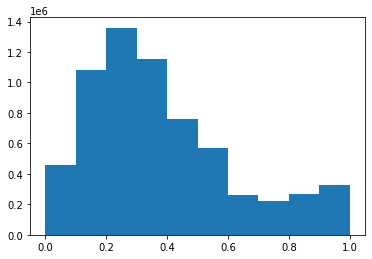

In [3]:
from matplotlib import pyplot as plt

plt.hist(training_labels)

In [4]:
import pandas as pd
def select_less_top_spectra(nr_of_spectra_cut_off, dataframe_with_tanimoto_scores, dataframe_with_scores):
    nr_of_matches_per_training_spectra = 2000
    
    tanimoto_df_per_spectrum = []
    scores_df_per_spectrum = []
    for i in range(0, len(dataframe_with_scores), nr_of_matches_per_training_spectra):
        scores_for_one_spectrum = dataframe_with_scores.iloc[i:i+nr_of_spectra_cut_off]
        tanimoto_scores_one_spectrum = dataframe_with_tanimoto_scores.iloc[i:i+nr_of_spectra_cut_off]
        tanimoto_df_per_spectrum.append(tanimoto_scores_one_spectrum)
        scores_df_per_spectrum.append(scores_for_one_spectrum)
        
    selected_tanimoto_scores = pd.concat(tanimoto_df_per_spectrum)
    selected_scores = pd.concat(scores_df_per_spectrum)
    
    return selected_tanimoto_scores, selected_scores

# Select the top 100
The top 100 spectra are selected, to get a bit better distribution of tanimoto scores in training data 

(array([ 6.29767442, 14.35844961, 18.48434109, 15.93581395, 11.09085271,
         8.46387597,  4.84      ,  4.78666667,  5.74883721,  9.99348837]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float32),
 <BarContainer object of 10 artists>)

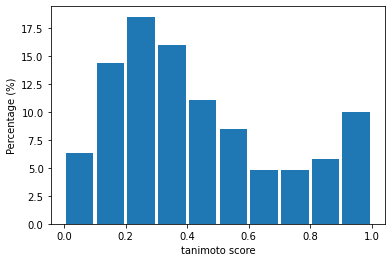

In [5]:
training_labels_top_100, training_scores_top_100 = select_less_top_spectra(100, training_labels, training_scores)
validation_labels_top_100, validation_scores_top_100 = select_less_top_spectra(100, validation_labels, validation_scores)

weight_to_convert_to_percentage = 100/len(training_labels_top_100)
weights = [weight_to_convert_to_percentage] * len(training_labels_top_100)

plt.xlabel("tanimoto score")
plt.ylabel("Percentage (%)")
plt.hist(training_labels_top_100, weights = weights, rwidth = 0.9)

# Train MS2Query model

# Model used trained with dropout regularisation

In [11]:
from ms2query.train_ms2query_nn import create_and_train_ms2query_nn
create_and_train_ms2query_nn(training_scores_top_100, training_labels_top_100, \
                             validation_scores_top_100, validation_labels_top_100, [48,48,1],\
                             save_name = "../downloads/gnps_210409/train_ms2query_model/ms2query_model_all_scores_dropout_regularization")

Epoch 1/100
20157/20157 [==============================] - 16s 768us/step - loss: 0.0439 - mae: 0.1602 - val_loss: 0.0330 - val_mae: 0.1406

Epoch 00001: val_loss improved from inf to 0.03299, saving model to ../downloads/gnps_210409/train_ms2query_model\ms2query_model_all_scores_dropout_regularization.hdf5
Epoch 2/100
20157/20157 [==============================] - 15s 748us/step - loss: 0.0324 - mae: 0.1381 - val_loss: 0.0338 - val_mae: 0.1427

Epoch 00002: val_loss did not improve from 0.03299
Epoch 3/100
20157/20157 [==============================] - 15s 728us/step - loss: 0.0317 - mae: 0.1364 - val_loss: 0.0333 - val_mae: 0.1424

Epoch 00003: val_loss did not improve from 0.03299
Epoch 4/100
20157/20157 [==============================] - 15s 736us/step - loss: 0.0313 - mae: 0.1354 - val_loss: 0.0310 - val_mae: 0.1360

Epoch 00004: val_loss improved from 0.03299 to 0.03100, saving model to ../downloads/gnps_210409/train_ms2query_model\ms2query_model_all_scores_dropout_regularization

20157/20157 [==============================] - 15s 736us/step - loss: 0.0296 - mae: 0.1310 - val_loss: 0.0286 - val_mae: 0.1332

Epoch 00038: val_loss improved from 0.02865 to 0.02860, saving model to ../downloads/gnps_210409/train_ms2query_model\ms2query_model_all_scores_dropout_regularization.hdf5
Epoch 39/100
20157/20157 [==============================] - 15s 730us/step - loss: 0.0295 - mae: 0.1309 - val_loss: 0.0290 - val_mae: 0.1324

Epoch 00039: val_loss did not improve from 0.02860
Epoch 40/100
20157/20157 [==============================] - 14s 711us/step - loss: 0.0296 - mae: 0.1309 - val_loss: 0.0295 - val_mae: 0.1335

Epoch 00040: val_loss did not improve from 0.02860
Epoch 41/100
20157/20157 [==============================] - 15s 742us/step - loss: 0.0297 - mae: 0.1312 - val_loss: 0.0306 - val_mae: 0.1377

Epoch 00041: val_loss did not improve from 0.02860
Epoch 42/100
20157/20157 [==============================] - 15s 748us/step - loss: 0.0296 - mae: 0.1312 - val_loss: 0.03

(<tensorflow.python.keras.engine.sequential.Sequential at 0x27c437c8d60>,
 {'loss': [0.036280062049627304,
   0.032132286578416824,
   0.03155849501490593,
   0.031193211674690247,
   0.03095720335841179,
   0.03080514259636402,
   0.030621100217103958,
   0.03044087253510952,
   0.03043675236403942,
   0.030338438227772713,
   0.03027227148413658,
   0.030184321105480194,
   0.0300731398165226,
   0.03003540076315403,
   0.02993984892964363,
   0.02997959591448307,
   0.029934268444776535,
   0.029919859021902084,
   0.029800420626997948,
   0.029821090400218964,
   0.029828546568751335,
   0.029888082295656204,
   0.029900923371315002,
   0.029848311096429825,
   0.029686251655220985,
   0.029628876596689224,
   0.029617823660373688,
   0.02966650016605854,
   0.029628215357661247,
   0.029666118323802948,
   0.029638154432177544,
   0.02968337945640087,
   0.02962462417781353,
   0.02968543767929077,
   0.029586846008896828,
   0.029641857370734215,
   0.029707325622439384,
   0.029

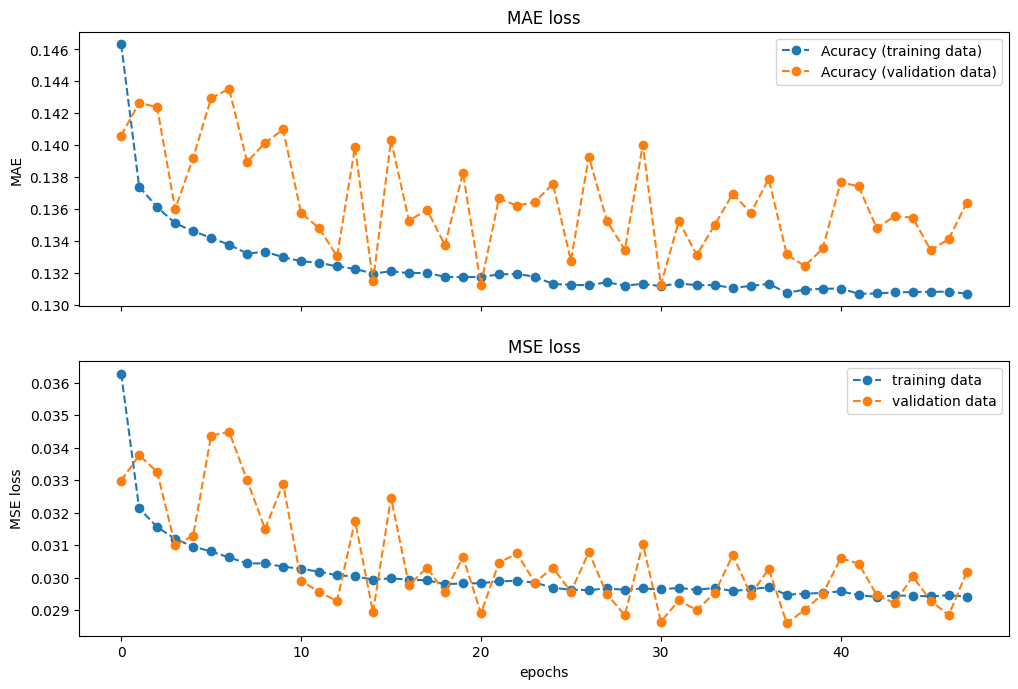

In [14]:
from ms2query.train_ms2query_nn import plot_history
from ms2query.utils import load_pickled_file

history = load_pickled_file("../downloads/gnps_210409/train_ms2query_model/ms2query_model_all_scores_dropout_regularization_train_hist.pickle")
plot_history(history)

### Train model without dropout active
The module train_ms2query_nn.py has been changed, since this training was performed, in the current version of MS2Query dropout regularization is implemented to prevent overfitting. 

In [33]:
from ms2query.train_ms2query_nn import create_and_train_ms2query_nn
create_and_train_ms2query_nn(training_scores_top_100, training_labels_top_100, \
                             validation_scores_top_100, validation_labels_top_100, [48,48,1],\
                             save_name = "../downloads/gnps_210409/train_ms2query_model/ms2query_model_all_scores")

Epoch 1/100
20157/20157 [==============================] - 24s 1ms/step - loss: 0.0342 - mae: 0.1426 - val_loss: 0.0299 - val_mae: 0.1324

Epoch 00001: val_loss improved from inf to 0.02989, saving model to ../downloads/gnps_210409/train_ms2query_model\ms2query_model_all_scores.hdf5
Epoch 2/100
20157/20157 [==============================] - 13s 650us/step - loss: 0.0293 - mae: 0.1294 - val_loss: 0.0291 - val_mae: 0.1297

Epoch 00002: val_loss improved from 0.02989 to 0.02908, saving model to ../downloads/gnps_210409/train_ms2query_model\ms2query_model_all_scores.hdf5
Epoch 3/100
20157/20157 [==============================] - 13s 646us/step - loss: 0.0284 - mae: 0.1267 - val_loss: 0.0283 - val_mae: 0.1272

Epoch 00003: val_loss improved from 0.02908 to 0.02827, saving model to ../downloads/gnps_210409/train_ms2query_model\ms2query_model_all_scores.hdf5
Epoch 4/100
20157/20157 [==============================] - 13s 644us/step - loss: 0.0281 - mae: 0.1259 - val_loss: 0.0297 - val_mae: 0.1


Epoch 00036: val_loss did not improve from 0.02586
Epoch 37/100
20157/20157 [==============================] - 13s 641us/step - loss: 0.0244 - mae: 0.1162 - val_loss: 0.0260 - val_mae: 0.1199

Epoch 00037: val_loss did not improve from 0.02586
Epoch 38/100
20157/20157 [==============================] - 13s 657us/step - loss: 0.0243 - mae: 0.1163 - val_loss: 0.0269 - val_mae: 0.1224

Epoch 00038: val_loss did not improve from 0.02586
Epoch 39/100
20157/20157 [==============================] - 13s 656us/step - loss: 0.0243 - mae: 0.1161 - val_loss: 0.0259 - val_mae: 0.1204

Epoch 00039: val_loss did not improve from 0.02586
Epoch 40/100
20157/20157 [==============================] - 13s 657us/step - loss: 0.0243 - mae: 0.1162 - val_loss: 0.0258 - val_mae: 0.1220

Epoch 00040: val_loss improved from 0.02586 to 0.02582, saving model to ../downloads/gnps_210409/train_ms2query_model\ms2query_model_all_scores.hdf5
Epoch 41/100
20157/20157 [==============================] - 14s 684us/step - l

(<tensorflow.python.keras.engine.sequential.Sequential at 0x2362fc31820>,
 {'loss': [0.031496305018663406,
   0.02897644229233265,
   0.028264440596103668,
   0.027927471324801445,
   0.027639517560601234,
   0.027369525283575058,
   0.02715250663459301,
   0.027000227943062782,
   0.02679959498345852,
   0.02651801146566868,
   0.02633279375731945,
   0.02611823007464409,
   0.025944558903574944,
   0.025843774899840355,
   0.025710176676511765,
   0.025606919080018997,
   0.025482570752501488,
   0.025425130501389503,
   0.025325879454612732,
   0.025274762883782387,
   0.02519717626273632,
   0.025126438587903976,
   0.025033285841345787,
   0.02500300481915474,
   0.024940233677625656,
   0.02493630349636078,
   0.02482735365629196,
   0.024790585041046143,
   0.02474038675427437,
   0.024725740775465965,
   0.024685680866241455,
   0.024652373045682907,
   0.024575894698500633,
   0.02452464960515499,
   0.024465490132570267,
   0.024401040747761726,
   0.0243966244161129,
   0.02

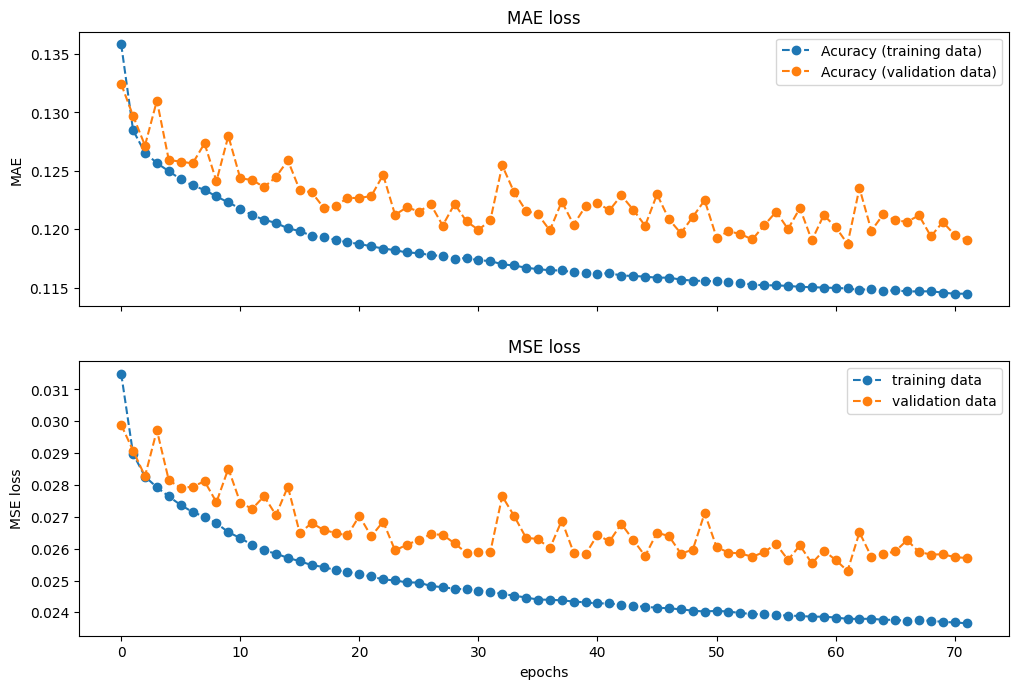

In [1]:
from ms2query.train_ms2query_nn import plot_history
from ms2query.utils import load_pickled_file

history = load_pickled_file("../downloads/gnps_210409/train_ms2query_model/ms2query_model_all_scores_train_hist.pickle")
plot_history(history)

In [15]:
from ms2query.train_ms2query_nn import create_and_train_ms2query_nn
create_and_train_ms2query_nn(training_scores_top_100, training_labels_top_100, \
                             validation_scores_top_100, validation_labels_top_100, [48,48,1],\
                             save_name = "../downloads/gnps_210409/train_ms2query_model/ms2query_model_all_scores_test_without_drop_reg")

Epoch 1/100
20157/20157 [==============================] - 15s 741us/step - loss: 0.0487 - mae: 0.1658 - val_loss: 0.0307 - val_mae: 0.1363

Epoch 00001: val_loss improved from inf to 0.03069, saving model to ../downloads/gnps_210409/train_ms2query_model\ms2query_model_all_scores_test_without_drop_reg.hdf5
Epoch 2/100
20157/20157 [==============================] - 15s 749us/step - loss: 0.0322 - mae: 0.1375 - val_loss: 0.0302 - val_mae: 0.1340

Epoch 00002: val_loss improved from 0.03069 to 0.03022, saving model to ../downloads/gnps_210409/train_ms2query_model\ms2query_model_all_scores_test_without_drop_reg.hdf5
Epoch 3/100
20157/20157 [==============================] - 16s 798us/step - loss: 0.0315 - mae: 0.1360 - val_loss: 0.0298 - val_mae: 0.1352

Epoch 00003: val_loss improved from 0.03022 to 0.02980, saving model to ../downloads/gnps_210409/train_ms2query_model\ms2query_model_all_scores_test_without_drop_reg.hdf5
Epoch 4/100
20157/20157 [==============================] - 16s 817us

(<tensorflow.python.keras.engine.sequential.Sequential at 0x27c3dfe8d90>,
 {'loss': [0.0377437062561512,
   0.032058898359537125,
   0.031359490007162094,
   0.030985286459326744,
   0.030873410403728485,
   0.030745957046747208,
   0.030509646981954575,
   0.030428485944867134,
   0.0303351953625679,
   0.030206728726625443,
   0.030108964070677757,
   0.03004748746752739,
   0.02999347820878029,
   0.029870709404349327,
   0.02983049303293228,
   0.029742486774921417,
   0.029731489717960358,
   0.02960534766316414,
   0.029587093740701675,
   0.02953800931572914,
   0.02941703051328659,
   0.029384074732661247,
   0.029547272250056267,
   0.029541045427322388,
   0.029448842629790306],
  'mae': [0.14865246415138245,
   0.13719117641448975,
   0.1356363445520401,
   0.1346176117658615,
   0.1343172788619995,
   0.13401444256305695,
   0.1333668828010559,
   0.13320720195770264,
   0.1329200267791748,
   0.13278326392173767,
   0.1324930042028427,
   0.132395938038826,
   0.1322785615

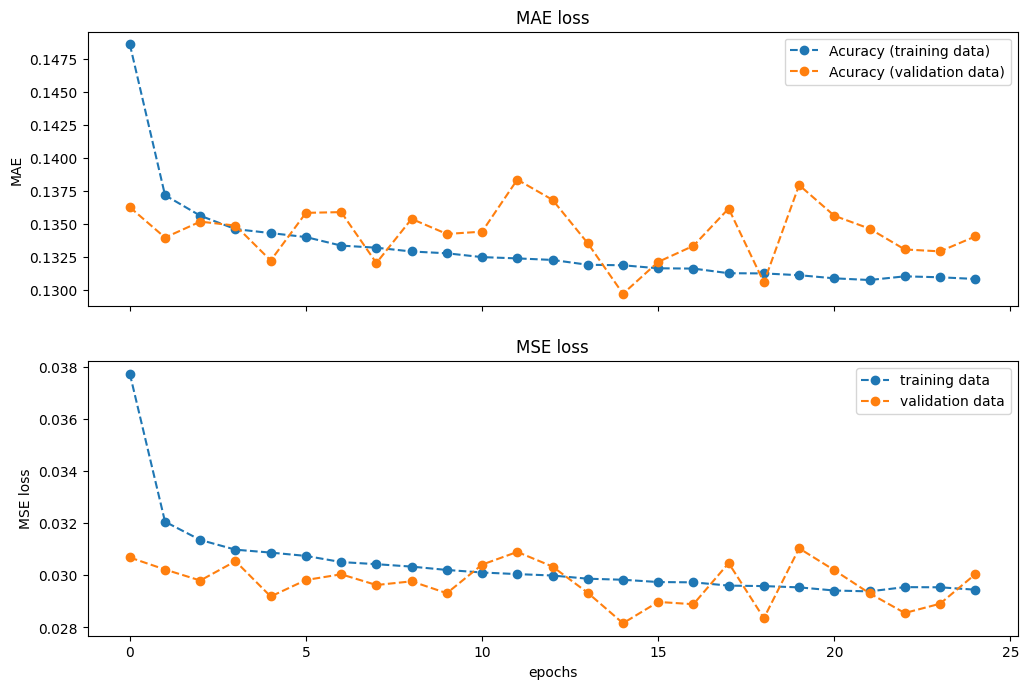

In [17]:
from ms2query.train_ms2query_nn import plot_history
from ms2query.utils import load_pickled_file

history = load_pickled_file("../downloads/gnps_210409/train_ms2query_model/ms2query_model_all_scores_test_without_drop_reg_train_hist.pickle")
plot_history(history)